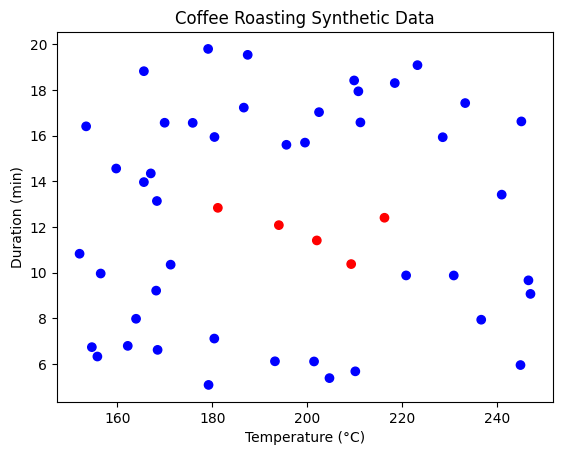

50 2


In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1 - Synthetic data
np.random.seed(42)

# 50 examples
temperature = np.random.uniform(150, 250, 50)   # between 150°C and 250°C
duration = np.random.uniform(5, 20, 50)         # between 5 and 20 minutes

# Label rule (synthetic): 
# Perfect roast if temperature between 180-220 and duration between 8-15
Y = np.where((temperature > 180) & (temperature < 220) & (duration > 8) & (duration < 15), 1, 0)

# Combine into a feature matrix
X = np.vstack((temperature, duration)).T

plt.scatter(temperature, duration, c=Y, cmap="bwr")
plt.xlabel("Temperature (°C)")
plt.ylabel("Duration (min)")
plt.title("Coffee Roasting Synthetic Data")
plt.show()
m , n = X.shape
print(m , n)

In [98]:
np.random.seed(0)

n_input = 2
n_hidden = 3
n_out = 1
# np.random.randn() gives random numbers from a normal (Gaussian) distribution with mean 0 and standard deviation 1.

# We do this so each weight starts slightly differently,
# because if all weights were the same, every neuron would learn the same thing — the network wouldn’t work.
# So we initialize weights randomly to break symmetry.

W1= np.random.randn(n_hidden , n_input) * 0.01
b1 = np.zeros((n_hidden , 1))

W2= np.random.randn(n_out , n_hidden) * 0.01
b2 = np.zeros((n_out , 1))



In [99]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))
def relu(z):
    return np.maximum(0 , z)

In [100]:
def forward_prop(X , W1 , W2 , b1 , b2):
    X = X.T
    Z1 = np.dot(W1 , X) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2 , A1) + b2
    A2 = sigmoid(Z2)
    return A1 , A2 ,Z1 , Z2

In [101]:
A1 , A2 , Z1 , Z2 = forward_prop(X , W1=W1 , W2=W2 , b1=b1 , b2=b2)
print("Output shape:", A2.shape)
print("Predicted values (before training):", A2[:, :5])

Output shape: (1, 50)
Predicted values (before training): [[0.50632573 0.5082381  0.50751699 0.50706967 0.50557669]]


In [102]:
def compute_cost(A2 ,y):
    m  = len(y)
    cost = - (1 /m) * np.sum(y.T*np.log(A2) + (1 -y.T) *np.log(1-A2))
    return np.squeeze(cost)

In [103]:
def compute_gradient(X , Y , A1 , A2 , W2): # back propogation
    m = len(Y)
    dz2 = A2 -  Y
    dW2 = (1/m)* np.dot(dz2  , A1.T)
    db2 = (1/m) * np.sum(dz2)

    dA1 = np.dot(W2 , A1.T)
    dz1 = dA1 * (A1 > 0)
    dW1 = (1/m) * np.dot(dz1 , X.T)
    db1 = (1/m) * np.sum(dz1)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

In [104]:
def update_parameters(W1, b1, W2, b2, grads, learning_rate=0.01):
    W1 -= learning_rate * grads["dW1"]
    b1 -= learning_rate * grads["db1"]
    W2 -= learning_rate * grads["dW2"]
    b2 -= learning_rate * grads["db2"]
    return W1, b1, W2, b2

In [105]:
for i in range(10000):
    A1, A2, Z1, Z2 = forward_prop(X , W1=W1 , W2=W2 , b1=b1 , b2=b2)
    cost = compute_cost(A2, Y)
    grads = compute_gradient(X, Y,A1, A2 , W2)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, grads)

    if i % 1000 == 0:
        print(f"Cost after iteration {i}: {cost:.4f}")

ValueError: shapes (1,3) and (50,3) not aligned: 3 (dim 1) != 50 (dim 0)

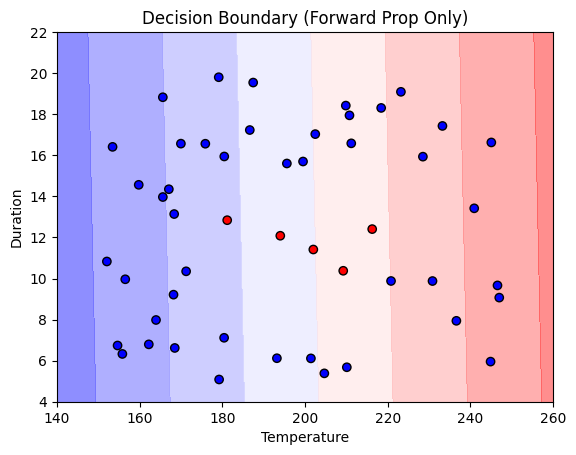

In [ ]:
def plot_decision_boundary(W1, b1, W2, b2):
    x_min, x_max = 140, 260
    y_min, y_max = 4, 22
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    _, A2 = forward_prop(grid, W1, W2, b1, b2)
    Z = A2.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap="bwr", alpha=0.5)
    plt.scatter(temperature, duration, c=Y, cmap="bwr", edgecolors="k")
    plt.xlabel("Temperature")
    plt.ylabel("Duration")
    plt.title("Decision Boundary (Forward Prop Only)")
    plt.show()

plot_decision_boundary(W1, b1, W2, b2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 9 - Using Sequential API
model = Sequential([
    Dense(3, activation='relu', input_shape=(2,)),  # hidden layer
    Dense(1, activation='sigmoid')                  # output layer
])

model.summary()


/Users/ankush/Code/AI-ML/ML-Classified/env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
model.fit(X , Y , epochs=100 , verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9021 - loss: 0.6931  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8917 - loss: 0.6923
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8812 - loss: 0.6915
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9021 - loss: 0.6907
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9125 - loss: 0.6898
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9125 - loss: 0.6890
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9125 - loss: 0.6882
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9229 - loss: 0.6872
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8812 - loss: 0.6870 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9125 - loss: 0.6858 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8917 - loss: 0.6853 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8812 - loss: 0.